# import data and libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
%matplotlib inline

In [4]:
#folder shortcut
path = r'C:\Users\katey\Desktop\Final Unit CareerFoundry\6.1\citi_61.csv'

In [5]:
citi = pd.read_csv(os.path.join(path, '02 Data','prepared data', 'citi_61.csv'), index_col = False)

In [6]:
station =pd.read_csv(os.path.join(path, '02 Data','prepared data', 'bike_station.csv'), index_col = False)

In [7]:
station.head()

,Unnamed: 0,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,0,72,40.767272,-73.993929,5.642857
1,1,79,40.719116,-74.006667,4.357143
2,2,82,40.711174,-74.000165,2.185185
3,3,83,40.683826,-73.976323,2.571429
4,4,116,40.741776,-74.001497,8.966667


In [8]:
columns_to_drop_1=['Unnamed: 0']

In [9]:
station=station.drop(columns_to_drop, axis=1)

NameError: name 'columns_to_drop' is not defined

In [10]:
station

,Unnamed: 0,start_station_id,start_station_latitude,start_station_longitude,average_daily_rides
0,0,72,40.767272,-73.993929,5.642857
1,1,79,40.719116,-74.006667,4.357143
2,2,82,40.711174,-74.000165,2.185185
3,3,83,40.683826,-73.976323,2.571429
4,4,116,40.741776,-74.001497,8.966667
...,...,...,...,...,...
325,325,2017,40.750224,-73.971214,3.000000
326,326,2021,40.759291,-73.988597,5.357143
327,327,2022,40.758491,-73.959206,3.310345
328,328,2023,40.759681,-73.970314,3.217391


In [11]:
citi.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'day_of_week',
       'start_hour', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'ride_start',
       'ride_end', 'Trip category', 'ride_start_date', 'ride_start_time'],
      dtype='object')

In [12]:
citi_1=citi[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'ride_start', 'ride_end',
       'Trip category', 'ride_start_date', 'ride_start_time']]

In [13]:
citi_1

,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,18:18:55
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,18:38:53
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,19:44:04
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,11:54:37
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,22:01:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42988,Sat,15,435,W 21 St & 6 Ave,40.741740,-73.994156,448,W 37 St & 10 Ave,40.756604,-73.997901,975,Subscriber,1973.0,1,2013-09-28 15:30:14,2013-09-28 15:46:29,10-20 minutes,2013-09-28,15:30:14
42989,Sun,16,224,Spruce St & Nassau St,40.711464,-74.005524,301,E 2 St & Avenue B,40.722174,-73.983688,1541,Subscriber,1975.0,1,2013-09-01 16:27:11,2013-09-01 16:52:52,over 20 minutes,2013-09-01,16:27:11
42990,Sat,17,261,Johnson St & Gold St,40.694749,-73.983625,151,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970.0,2,2013-09-14 17:32:26,2013-09-14 17:52:17,10-20 minutes,2013-09-14,17:32:26
42991,Sat,18,402,Broadway & E 22 St,40.740343,-73.989551,524,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961.0,2,2013-09-07 18:08:21,2013-09-07 18:25:51,10-20 minutes,2013-09-07,18:08:21


In [14]:
citi_1.describe()

,start_hour,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,trip_duration,birth_year,gender
count,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000,42993.000000
mean,14.085316,437.205545,40.734477,-73.990948,434.577094,40.734070,-73.991242,770.502105,1975.674459,1.247854
std,4.932889,340.848654,0.019598,0.012367,332.801118,0.019603,0.012375,523.444233,10.938735,0.431880
min,0.000000,72.000000,40.680342,-74.017134,72.000000,40.680342,-74.017134,60.000000,1924.000000,0.000000
25%,10.000000,304.000000,40.721101,-74.000040,305.000000,40.720828,-74.000271,395.000000,1968.000000,1.000000
50%,15.000000,402.000000,40.736245,-73.990765,402.000000,40.735877,-73.990985,621.000000,1978.000000,1.000000
75%,18.000000,485.000000,40.749718,-73.981948,483.000000,40.749013,-73.982578,999.000000,1984.000000,1.000000
max,23.000000,3002.000000,40.770513,-73.950048,3002.000000,40.770513,-73.950048,2697.000000,1997.000000,2.000000


/var/folders/m5/3mh2pv4515x_4878stjhkt780000gn/T/ipykernel_50847/1648765124.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(citi_1['trip_duration'], bins=60) # Shows extreme values


<Axes: xlabel='trip_duration', ylabel='Density'>

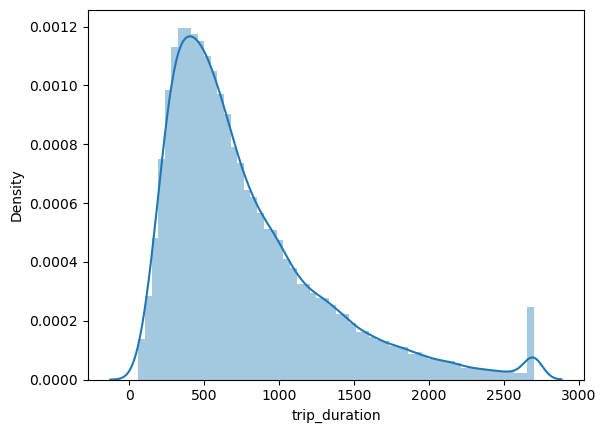

In [15]:
sns.distplot(citi_1['trip_duration'], bins=60) 



In [16]:
data_types = {
    'ride_start_date': 'datetime64'
}

In [17]:
file_path = os.path.join(path, '02 Data','prepared data','citi_61.csv')

In [18]:
parse_dates = ['ride_start_date']

In [19]:
citi_1 = pd.read_csv(file_path, parse_dates=parse_dates)

In [20]:
hour_counts = citi_1.groupby(['start_hour',citi_1['ride_start_date'].dt.date])['ride_start_date'].count()

In [21]:
hour_counts

start_hour  ride_start_date
0           2013-09-01         15
            2013-09-02         15
            2013-09-03          5
            2013-09-04          9
            2013-09-05         13
                               ..
23          2013-09-26         38
            2013-09-27         44
            2013-09-28         48
            2013-09-29         21
            2013-09-30         17
Name: ride_start_date, Length: 711, dtype: int64

In [22]:
avg_rides_per_hour = hour_counts.groupby('start_hour').mean().reset_index()

In [23]:
avg_rides_per_hour

,start_hour,ride_start_date
0,0,14.000000
1,1,8.866667
2,2,5.586207
3,3,3.692308
4,4,2.777778
5,5,6.724138
6,6,29.633333
7,7,66.000000
8,8,104.233333
9,9,86.600000


In [24]:
day_counts = citi_1.groupby('day_of_week')['ride_start_date'].count().reset_index()

In [25]:
day_counts

,day_of_week,ride_start_date
0,Fri,6594
1,Mon,6797
2,Sat,4965
3,Sun,5506
4,Thu,6212
5,Tue,6429
6,Wed,6490


In [26]:
day_hour_counts = citi_1.groupby([ 'day_of_week','start_hour'])['ride_start_date'].count()

In [27]:
day_hour_counts

day_of_week  start_hour
Fri          0              48
             1              36
             2              23
             3              10
             4              10
                          ... 
Wed          19            479
             20            297
             21            213
             22            188
             23            103
Name: ride_start_date, Length: 168, dtype: int64

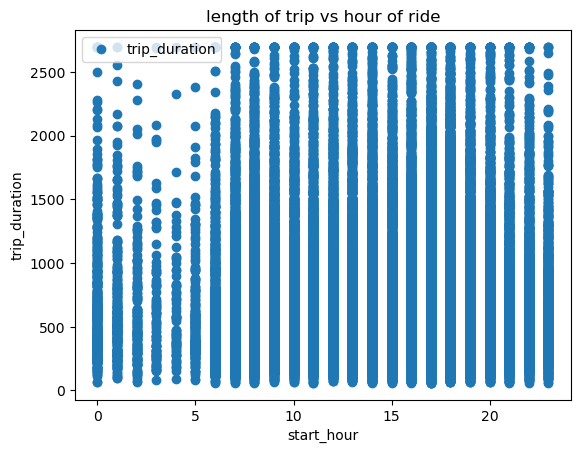

In [28]:
citi_1.plot(x = 'start_hour', y='trip_duration',style='o') 
plt.title('length of trip vs hour of ride')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

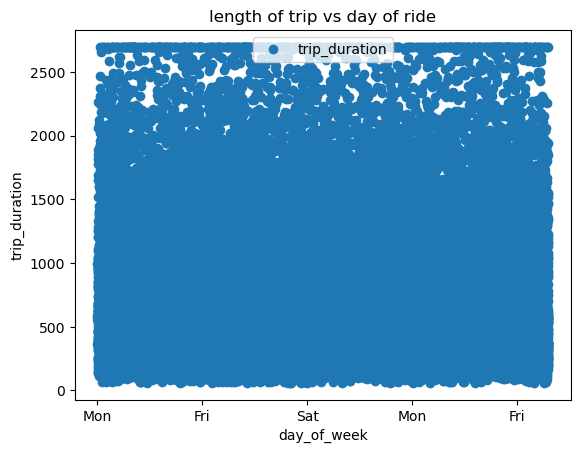

In [29]:
citi_1.plot(x = 'day_of_week', y='trip_duration',style='o') 
plt.title('length of trip vs day of ride')  
plt.xlabel('day_of_week')  
plt.ylabel('trip_duration')  
plt.show()

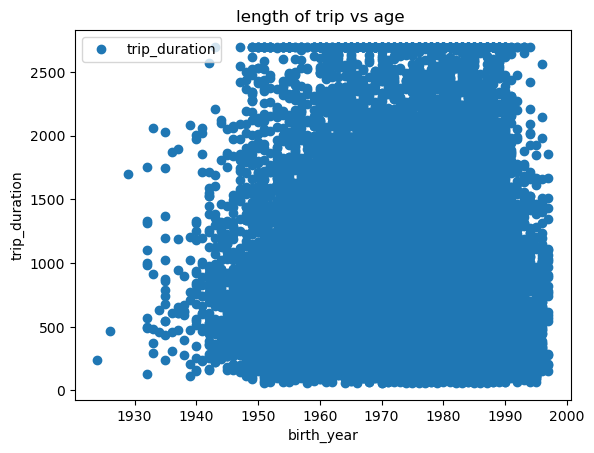

In [30]:
citi_1.plot(x = 'birth_year', y='trip_duration',style='o') 
plt.title('length of trip vs age ')  
plt.xlabel('birth_year')  
plt.ylabel('trip_duration')  
plt.show()

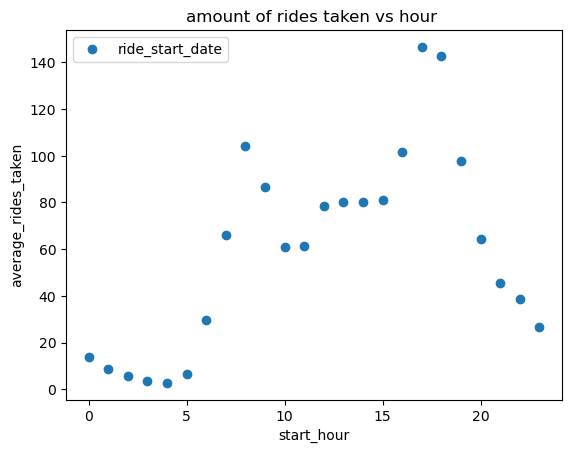

In [31]:
avg_rides_per_hour.plot(x = 'start_hour', y='ride_start_date',style='o') 
plt.title('amount of rides taken vs hour ')  
plt.xlabel('start_hour')  
plt.ylabel('average_rides_taken')  
plt.show()

In [32]:
avg_rides_per_hour

,start_hour,ride_start_date
0,0,14.000000
1,1,8.866667
2,2,5.586207
3,3,3.692308
4,4,2.777778
5,5,6.724138
6,6,29.633333
7,7,66.000000
8,8,104.233333
9,9,86.600000


In [33]:
citi_1.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'day_of_week',
       'start_hour', 'start_station_id', 'start_station_name',
       'start_station_latitude', 'start_station_longitude', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'ride_start',
       'ride_end', 'Trip category', 'ride_start_date', 'ride_start_time'],
      dtype='object')

In [34]:
ride_counts = pd.get_dummies(citi_1, columns=['day_of_week', 'start_hour'], drop_first=True)

In [35]:
ride_counts

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_hour_14,start_hour_15,start_hour_16,start_hour_17,start_hour_18,start_hour_19,start_hour_20,start_hour_21,start_hour_22,start_hour_23
0,0,0,0,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,...,0,0,0,0,1,0,0,0,0,0
1,1,1,1,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,...,0,0,0,0,1,0,0,0,0,0
2,2,2,2,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,...,0,0,0,0,0,1,0,0,0,0
3,3,3,3,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42988,42988,42988,42988,435,W 21 St & 6 Ave,40.741740,-73.994156,448,W 37 St & 10 Ave,40.756604,...,0,1,0,0,0,0,0,0,0,0
42989,42989,42989,42989,224,Spruce St & Nassau St,40.711464,-74.005524,301,E 2 St & Avenue B,40.722174,...,0,0,1,0,0,0,0,0,0,0
42990,42990,42990,42990,261,Johnson St & Gold St,40.694749,-73.983625,151,Cleveland Pl & Spring St,40.721816,...,0,0,0,1,0,0,0,0,0,0
42991,42991,42991,42991,402,Broadway & E 22 St,40.740343,-73.989551,524,W 43 St & 6 Ave,40.755273,...,0,0,0,0,1,0,0,0,0,0


In [36]:
ride_counts.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'ride_start', 'ride_end',
       'Trip category', 'ride_start_date', 'ride_start_time',
       'day_of_week_Mon', 'day_of_week_Sat', 'day_of_week_Sun',
       'day_of_week_Thu', 'day_of_week_Tue', 'day_of_week_Wed', 'start_hour_1',
       'start_hour_2', 'start_hour_3', 'start_hour_4', 'start_hour_5',
       'start_hour_6', 'start_hour_7', 'start_hour_8', 'start_hour_9',
       'start_hour_10', 'start_hour_11', 'start_hour_12', 'start_hour_13',
       'start_hour_14', 'start_hour_15', 'start_hour_16', 'start_hour_17',
       'start_hour_18', 'start_hour_19', 'start_hour_20', 'start_hour_21',
       'start_hour_22', 'start_hour_23'],
      dtype='object')

In [37]:
rides_per_hour_count = hour_counts.groupby('start_hour').count().reset_index()


In [38]:
hour_counts_1 = citi_1.groupby('start_hour')['ride_start_date'].count()

In [39]:
hour_counts_1

start_hour
0      420
1      266
2      162
3       96
4       75
5      195
6      889
7     1980
8     3127
9     2598
10    1827
11    1841
12    2353
13    2408
14    2401
15    2436
16    3046
17    4398
18    4280
19    2930
20    1932
21    1371
22    1159
23     803
Name: ride_start_date, dtype: int64

In [40]:
hourly_aggregated = citi_1.groupby('start_hour').agg({
    'ride_start_date': 'count',          
    'trip_duration': 'mean'              
}).reset_index()


In [41]:
hourly_aggregated

,start_hour,ride_start_date,trip_duration
0,0,420,748.716667
1,1,266,702.657895
2,2,162,659.561728
3,3,96,687.020833
4,4,75,667.106667
5,5,195,605.348718
6,6,889,648.613048
7,7,1980,727.038384
8,8,3127,756.595459
9,9,2598,728.346035


In [42]:
hourly_aggregated.rename(columns={'ride_start_date': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

In [43]:
hourly_aggregated

,start_hour,ride_count,avg_trip_duration
0,0,420,748.716667
1,1,266,702.657895
2,2,162,659.561728
3,3,96,687.020833
4,4,75,667.106667
5,5,195,605.348718
6,6,889,648.613048
7,7,1980,727.038384
8,8,3127,756.595459
9,9,2598,728.346035


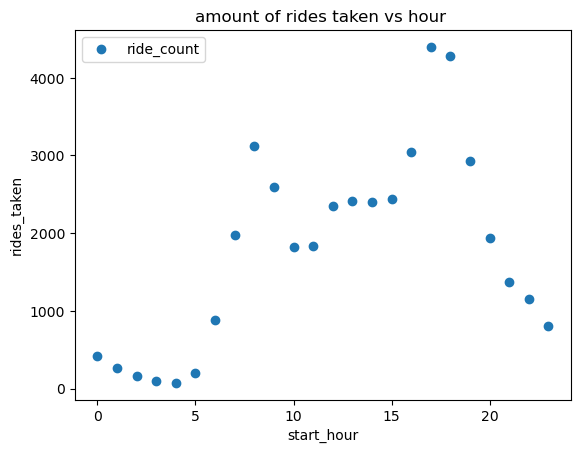

In [44]:
hourly_aggregated.plot(x = 'start_hour', y='ride_count',style='o') 
plt.title('amount of rides taken vs hour ')  
plt.xlabel('start_hour')  
plt.ylabel('rides_taken')  
plt.show()

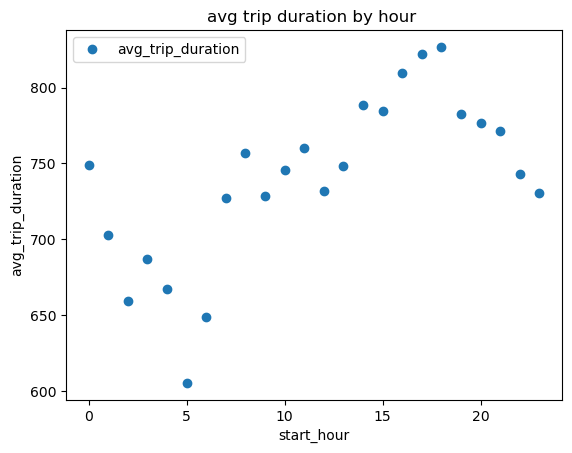

In [45]:
hourly_aggregated.plot(x = 'start_hour', y='avg_trip_duration',style='o') 
plt.title('avg trip duration by hour ')  
plt.xlabel('start_hour')  
plt.ylabel('avg_trip_duration')  
plt.show()

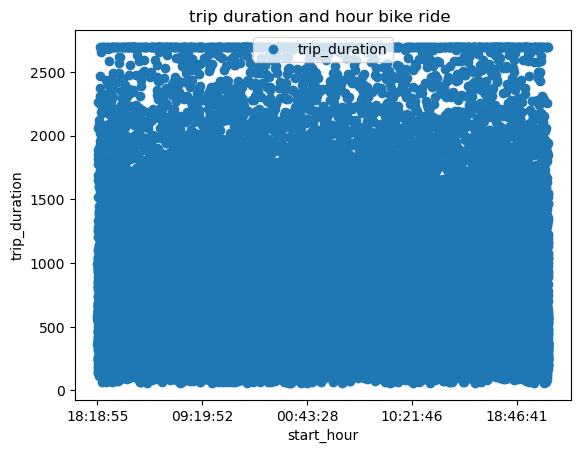

In [46]:
citi_1.plot(x = 'ride_start_time', y='trip_duration',style='o') 
plt.title('trip duration and hour bike ride ')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [47]:
citi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.2             42993 non-null  int64         
 1   Unnamed: 0.1             42993 non-null  int64         
 2   Unnamed: 0               42993 non-null  int64         
 3   day_of_week              42993 non-null  object        
 4   start_hour               42993 non-null  int64         
 5   start_station_id         42993 non-null  int64         
 6   start_station_name       42993 non-null  object        
 7   start_station_latitude   42993 non-null  float64       
 8   start_station_longitude  42993 non-null  float64       
 9   end_station_id           42993 non-null  int64         
 10  end_station_name         42993 non-null  object        
 11  end_station_latitude     42993 non-null  float64       
 12  end_station_longitude    42993 n

In [48]:
data_types = {
    'ride_start_time': 'datetime64'
}

In [49]:
file_path_1 = os.path.join(path, '02 Data','prepared data','citi_61.csv')

In [50]:
parse_dates = ['ride_start_time']

In [51]:
citi_1 = pd.read_csv(file_path_1, parse_dates=parse_dates)

In [52]:
citi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42993 entries, 0 to 42992
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0.2             42993 non-null  int64         
 1   Unnamed: 0.1             42993 non-null  int64         
 2   Unnamed: 0               42993 non-null  int64         
 3   day_of_week              42993 non-null  object        
 4   start_hour               42993 non-null  int64         
 5   start_station_id         42993 non-null  int64         
 6   start_station_name       42993 non-null  object        
 7   start_station_latitude   42993 non-null  float64       
 8   start_station_longitude  42993 non-null  float64       
 9   end_station_id           42993 non-null  int64         
 10  end_station_name         42993 non-null  object        
 11  end_station_latitude     42993 non-null  float64       
 12  end_station_longitude    42993 n

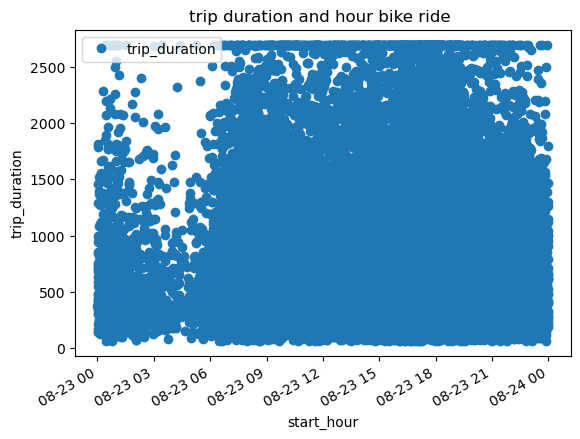

In [53]:
citi_1.plot(x = 'ride_start_time', y='trip_duration',style='o') 
plt.title('trip duration and hour bike ride ')  
plt.xlabel('start_hour')  
plt.ylabel('trip_duration')  
plt.show()

In [54]:
hourly_aggregated = citi_1.groupby('start_hour').agg({
    'ride_start_date': 'count',          
    'trip_duration': 'mean'              
}).reset_index()


In [55]:
hourly_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_hour       24 non-null     int64  
 1   ride_start_date  24 non-null     int64  
 2   trip_duration    24 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 704.0 bytes


In [59]:
hourly_aggregated.rename(columns={'ride_start_date': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

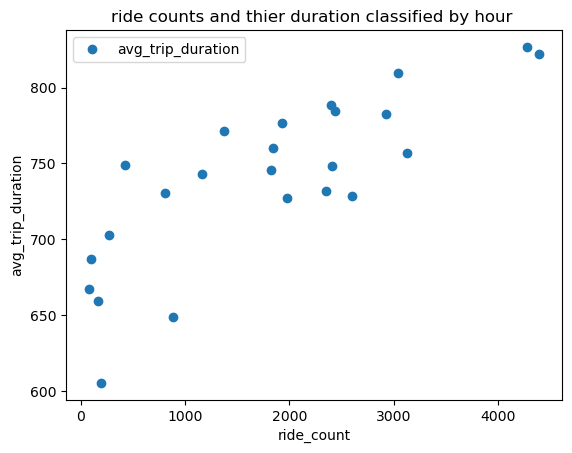

In [60]:
hourly_aggregated.plot(x = 'ride_count', y='avg_trip_duration',style='o') 
plt.title('ride counts and thier duration classified by hour ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

The times where more rides takes place correlates with the longer the ride durations.

In [62]:
q1=hourly_aggregated['ride_count'].quantile(0.25)
q3=hourly_aggregated['ride_count'].quantile(0.75)
iqr = q3-q1

In [63]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [64]:
outliers = hourly_aggregated[(hourly_aggregated['ride_count'] < lower_bound) | (hourly_aggregated['ride_count'] > upper_bound)]

In [65]:
outliers

,start_hour,ride_count,avg_trip_duration


In [66]:
q1=hourly_aggregated['avg_trip_duration'].quantile(0.25)
q3=hourly_aggregated['avg_trip_duration'].quantile(0.75)
iqr = q3-q1

In [67]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [68]:
outliers_1 = hourly_aggregated[(hourly_aggregated['avg_trip_duration'] < lower_bound) | (hourly_aggregated['avg_trip_duration'] > upper_bound)]

In [69]:
outliers_1

,start_hour,ride_count,avg_trip_duration
5,5,195,605.348718


In [70]:
q1=citi_1['trip_duration'].quantile(0.25)
q3=citi_1['trip_duration'].quantile(0.75)
iqr = q3-q1

In [71]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

In [72]:
outliers_2 = citi_1[(citi_1['trip_duration'] < lower_bound) | (citi_1['trip_duration'] > upper_bound)]

In [73]:
outliers_2

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
27,27,27,27,Thu,16,471,Grand St & Havemeyer St,40.712868,-73.956981,388,...,-74.002950,2057,Subscriber,1954.0,1,2013-09-19 16:35:39,2013-09-19 17:09:56,over 20 minutes,2013-09-19,2023-08-23 16:35:39
55,55,55,55,Wed,17,469,Broadway & W 53 St,40.763441,-73.982681,313,...,-73.967510,2262,Subscriber,1979.0,2,2013-09-11 17:11:27,2013-09-11 17:49:09,over 20 minutes,2013-09-11,2023-08-23 17:11:27
179,179,179,179,Mon,14,342,Columbia St & Rivington St,40.717400,-73.980166,342,...,-73.980166,2093,Subscriber,1960.0,2,2013-09-09 14:38:39,2013-09-09 15:13:32,over 20 minutes,2013-09-09,2023-08-23 14:38:39
183,183,183,183,Tue,10,391,Clark St & Henry St,40.697601,-73.993446,486,...,-73.988557,2124,Subscriber,1957.0,1,2013-09-24 10:32:52,2013-09-24 11:08:16,over 20 minutes,2013-09-24,2023-08-23 10:32:52
197,197,197,197,Thu,17,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,...,-73.976342,2251,Subscriber,1963.0,1,2013-09-05 17:31:47,2013-09-05 18:09:18,over 20 minutes,2013-09-05,2023-08-23 17:31:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42837,42837,42837,42837,Sun,18,448,W 37 St & 10 Ave,40.756604,-73.997901,514,...,-74.002777,2697,Subscriber,1990.0,2,2013-09-08 18:32:27,2013-09-08 19:22:58,over 20 minutes,2013-09-08,2023-08-23 18:32:27
42902,42902,42902,42902,Tue,7,278,Concord St & Bridge St,40.697666,-73.984764,352,...,-73.977225,2252,Subscriber,1976.0,2,2013-09-10 07:47:03,2013-09-10 08:24:35,over 20 minutes,2013-09-10,2023-08-23 07:47:03
42903,42903,42903,42903,Sun,16,242,Flushing Ave & Carlton Ave,40.697883,-73.973503,526,...,-73.984907,2697,Subscriber,1965.0,1,2013-09-22 16:10:00,2013-09-22 17:25:53,over 20 minutes,2013-09-22,2023-08-23 16:10:00
42909,42909,42909,42909,Mon,16,493,W 45 St & 6 Ave,40.756800,-73.982912,501,...,-73.971212,2697,Subscriber,1968.0,1,2013-09-09 16:13:08,2013-09-09 17:13:59,over 20 minutes,2013-09-09,2023-08-23 16:13:08


In [74]:
outliers_2.shape

(1976, 22)

In [75]:
citi_1.shape

(42993, 22)

In [76]:
filtered_citi = citi_1[(citi_1['trip_duration'] >= lower_bound) & (citi_1['trip_duration'] <= upper_bound)]

In [77]:
filtered_citi.shape

(41017, 22)

In [78]:
day_counts = citi_1.groupby('day_of_week')['ride_start_date'].count().reset_index()

In [79]:
day_counts

,day_of_week,ride_start_date
0,Fri,6594
1,Mon,6797
2,Sat,4965
3,Sun,5506
4,Thu,6212
5,Tue,6429
6,Wed,6490


In [80]:
daily_aggregated = citi_1.groupby('day_of_week').agg({
    'ride_start_date': 'count',          
    'trip_duration': 'mean'              
}).reset_index()


In [81]:
daily_aggregated

,day_of_week,ride_start_date,trip_duration
0,Fri,6594,764.061723
1,Mon,6797,761.585552
2,Sat,4965,804.035045
3,Sun,5506,814.107701
4,Thu,6212,750.656632
5,Tue,6429,749.886452
6,Wed,6490,763.153621


In [82]:
daily_aggregated.rename(columns={'ride_start_date': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

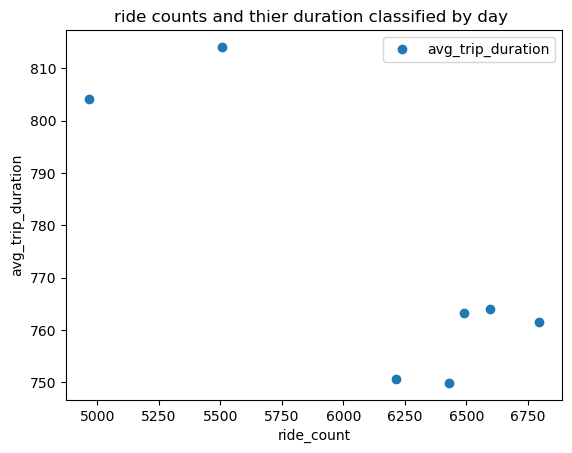

In [83]:
daily_aggregated.plot(x = 'ride_count', y='avg_trip_duration',style='o') 
plt.title('ride counts and thier duration classified by day ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

In [84]:
X = hourly_aggregated['ride_count'].values.reshape(-1,1)
y = hourly_aggregated['avg_trip_duration'].values.reshape(-1,1)

In [85]:
X

array([[ 420],
       [ 266],
       [ 162],
       [  96],
       [  75],
       [ 195],
       [ 889],
       [1980],
       [3127],
       [2598],
       [1827],
       [1841],
       [2353],
       [2408],
       [2401],
       [2436],
       [3046],
       [4398],
       [4280],
       [2930],
       [1932],
       [1371],
       [1159],
       [ 803]])

In [86]:
y

array([[748.71666667],
       [702.65789474],
       [659.5617284 ],
       [687.02083333],
       [667.10666667],
       [605.34871795],
       [648.61304837],
       [727.03838384],
       [756.59545891],
       [728.34603541],
       [745.68472906],
       [760.06518197],
       [732.08372291],
       [748.19684385],
       [788.49979175],
       [784.35057471],
       [809.88345371],
       [822.30832196],
       [826.91121495],
       [782.3105802 ],
       [776.41252588],
       [771.61050328],
       [742.78947368],
       [730.1992528 ]])

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [88]:
regression = LinearRegression() 

In [89]:
regression.fit(X_train, y_train)

LinearRegression()

In [90]:
y_predicted = regression.predict(X_test)

#Hypothesis testing!
If there are more riders then the average duration of each ride will increase.

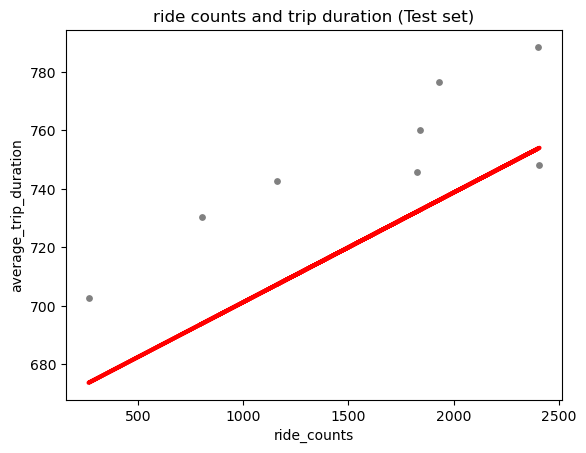

In [91]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('ride counts and trip duration (Test set)')
plot_test.xlabel('ride_counts')
plot_test.ylabel('average_trip_duration')
plot_test.show()

#Results
There is no correlation between the amount of riders and the trip's duration so this hypothesis is invalid. This is because even though the line is positve the dots are not close to the line which inidicates the correlation is too weak and makes this hypothesis invalid.

In [92]:
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [93]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03746822]]
Mean squared error:  901.4575617946246
R2 score:  -0.44678846872967615


In [94]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,760.065182,732.755282
1,745.684729,732.230727
2,742.789474,707.201956
3,788.499792,753.737485
4,776.412526,736.164890
5,702.657895,673.742836
6,748.196844,753.999763
7,730.199253,693.863270


This model's performance was bad during the test because when you compare the actual data to the predicted it is drastically off espeacially since the time is in seconds. Secondly the MSE Score is high and indiactes that this is not a good relations. The possible bias with this data could be user error. I personally have not logged out on a scooter when I got off and actually had to call the company to get a partial refund because someone else used it directly after me. This could be something that we look into futher to help with customer service if the company wants to, but all in all the other bias came from me assuming busier times were when people where getting off of work and assuming they had longer drives because I have a long commute so going forward I will avoid that bias in the data. 

In [147]:
citi_1.to_csv(os.path.join(path, '02 Data','prepared data', 'citi_6.csv'))

In [95]:
hourly_aggregated_filtered = filtered_citi.groupby('start_hour').agg({
    'ride_start_date': 'count',          
    'trip_duration': 'mean'              
}).reset_index()


In [96]:
hourly_aggregated_filtered

,start_hour,ride_start_date,trip_duration
0,0,403,677.868486
1,1,257,647.210117
2,2,158,620.936709
3,3,90,584.422222
4,4,73,616.589041
5,5,191,570.586387
6,6,863,598.979143
7,7,1908,668.484277
8,8,3023,705.284155
9,9,2504,668.774760


In [97]:
hourly_aggregated_filtered.rename(columns={'ride_start_date': 'ride_count', 'trip_duration': 'avg_trip_duration'}, inplace=True)

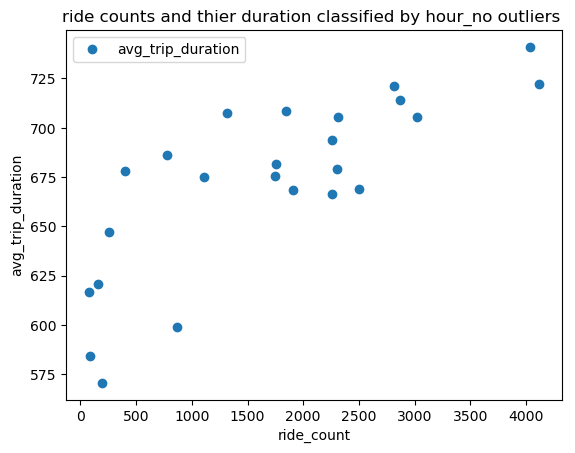

In [192]:
hourly_aggregated_filtered.plot(x = 'ride_count', y='avg_trip_duration',style='o') 
plt.title('ride counts and thier duration classified by hour_no outliers ')  
plt.xlabel('ride_count')  
plt.ylabel('avg_trip_duration')  
plt.show()

In [193]:
X_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['avg_trip_duration'].values.reshape(-1,1)

In [194]:
X_1_train, X_1_test, y_1_train, y_1_test = train_test_split(X_1, y_1, test_size=0.3, random_state=42)

In [195]:
regression = LinearRegression() 

In [196]:
regression.fit(X_1_train, y_1_train)

LinearRegression()

In [197]:
y_1_predicted = regression.predict(X_1_test)

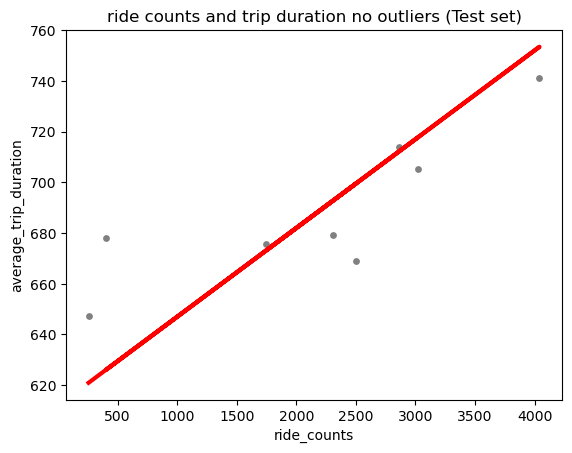

In [198]:
plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts and trip duration no outliers (Test set)')
plot_test_1.xlabel('ride_counts')
plot_test_1.ylabel('average_trip_duration')
plot_test_1.show()

In [199]:
rmse = mean_squared_error(y_1_test, y_1_predicted) # This is the mean squared error
r2 = r2_score(y_1_test, y_1_predicted) # This is the R2 score. 

In [200]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03503481]]
Mean squared error:  604.4295810846346
R2 score:  0.21346354916799082


In [201]:
data_1 = pd.DataFrame({'Actual': y_1_test.flatten(), 'Predicted': y_1_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,760.065182,732.755282
1,745.684729,732.230727
2,742.789474,707.201956
3,788.499792,753.737485
4,776.412526,736.164890
5,702.657895,673.742836
6,748.196844,753.999763
7,730.199253,693.863270


In [191]:
hourly_aggregated_filtered.head()

,start_hour,ride_count,avg_trip_duration,avg_trip_duration_min
0,0,403,677.868486,11.297808
1,1,257,647.210117,10.786835
2,2,158,620.936709,10.348945
3,3,90,584.422222,9.740370
4,4,73,616.589041,10.276484


In [109]:
citi_1.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,0,0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,...,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,2023-08-23 18:18:55
1,1,1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,...,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,2023-08-23 18:38:53
2,2,2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,...,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,2023-08-23 19:44:04
3,3,3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,...,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,2023-08-23 11:54:37
4,4,4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,...,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,2023-08-23 22:01:01


In [110]:
citi_clean=citi_1[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'ride_start', 'ride_end',
       'Trip category', 'ride_start_date', 'ride_start_time']]

In [111]:
hourly_aggregated_filtered.head()

,start_hour,ride_count,avg_trip_duration
0,0,403,677.868486
1,1,257,647.210117
2,2,158,620.936709
3,3,90,584.422222
4,4,73,616.589041


In [114]:
hourly_aggregated_filtered['avg_trip_duration_min']=hourly_aggregated_filtered['avg_trip_duration']/60

In [115]:
hourly_aggregated_filtered

,start_hour,ride_count,avg_trip_duration,avg_trip_duration_min
0,0,403,677.868486,11.297808
1,1,257,647.210117,10.786835
2,2,158,620.936709,10.348945
3,3,90,584.422222,9.740370
4,4,73,616.589041,10.276484
5,5,191,570.586387,9.509773
6,6,863,598.979143,9.982986
7,7,1908,668.484277,11.141405
8,8,3023,705.284155,11.754736
9,9,2504,668.774760,11.146246


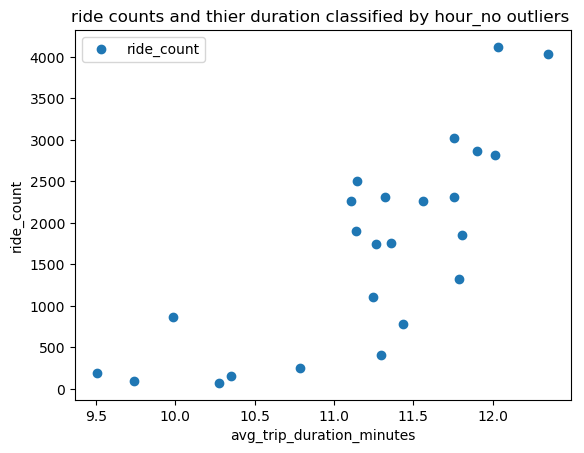

In [123]:
hourly_aggregated_filtered.plot(x = 'avg_trip_duration_min', y='ride_count',style='o') 
plt.title('ride counts and thier duration classified by hour_no outliers ')  
plt.xlabel('avg_trip_duration_minutes')  
plt.ylabel('ride_count')  
plt.show()

In [124]:
X_1 = hourly_aggregated_filtered['avg_trip_duration_min'].values.reshape(-1,1)
y_1 = hourly_aggregated_filtered['ride_count'].values.reshape(-1,1)

In [125]:
y_1_predicted = regression.predict(X_1_test)

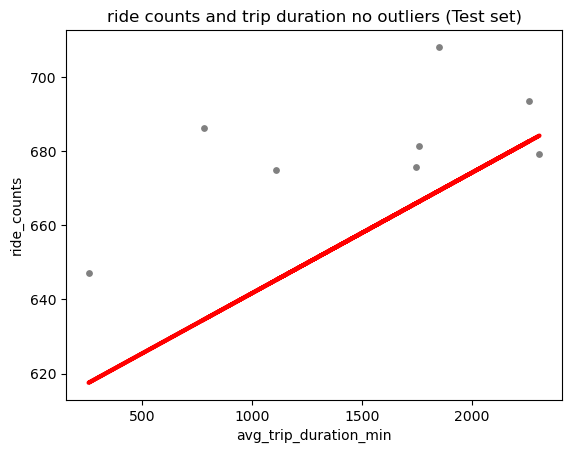

In [126]:
plot_test_1 = plt
plot_test_1.scatter(X_1_test, y_1_test, color='gray', s = 15)
plot_test_1.plot(X_1_test, y_1_predicted, color='red', linewidth =3)
plot_test_1.title('ride counts and trip duration no outliers (Test set)')
plot_test_1.xlabel('avg_trip_duration_min')
plot_test_1.ylabel('ride_counts')
plot_test_1.show()

In [127]:
rmse = mean_squared_error(y_1_test, y_1_predicted) 
r2 = r2_score(y_1_test, y_1_predicted) 

In [128]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.03257286]]
Mean squared error:  800.7986208916813
R2 score:  -2.000067520822081


In [129]:
ride_counts.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_hour_14,start_hour_15,start_hour_16,start_hour_17,start_hour_18,start_hour_19,start_hour_20,start_hour_21,start_hour_22,start_hour_23
0,0,0,0,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,...,0,0,0,0,1,0,0,0,0,0
1,1,1,1,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,...,0,0,0,0,1,0,0,0,0,0
2,2,2,2,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,...,0,0,0,0,0,1,0,0,0,0
3,3,3,3,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,...,0,0,0,0,0,0,0,0,0,0
4,4,4,4,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,...,0,0,0,0,0,0,0,0,1,0


In [133]:
X=hourly_aggregated_filtered[['start_hour','avg_trip_duration']]

In [135]:
import statsmodels.api as sm

In [136]:
X = sm.add_constant(X)

In [137]:
y = hourly_aggregated_filtered['ride_count']

In [138]:
model = sm.OLS(y, X).fit()

In [139]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     17.77
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           3.04e-05
Time:                        07:55:39   Log-Likelihood:                -191.95
No. Observations:                  24   AIC:                             389.9
Df Residuals:                      21   BIC:                             393.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.286e+04   3088.69

In [141]:
X = hourly_aggregated_filtered['start_hour']
y_count = hourly_aggregated_filtered['ride_count']
y_avg_duration = hourly_aggregated_filtered['avg_trip_duration']


In [142]:
X = sm.add_constant(X)

In [143]:
model_count = sm.OLS(y_count, X).fit()

In [144]:
model_avg_duration = sm.OLS(y_avg_duration, X).fit()


In [145]:
print("Model for Count of Rides:")
print(model_count.summary())
print("\nModel for Average Trip Duration:")
print(model_avg_duration.summary())

Model for Count of Rides:
                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     8.843
Date:                Wed, 23 Aug 2023   Prob (F-statistic):            0.00701
Time:                        07:57:38   Log-Likelihood:                -199.78
No. Observations:                  24   AIC:                             403.6
Df Residuals:                      22   BIC:                             405.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        658.2067    4

In [146]:
X = hourly_aggregated_filtered[['avg_trip_duration', 'start_hour']]
X = sm.add_constant(X)

In [147]:
y = hourly_aggregated_filtered['ride_count']

In [148]:
model = sm.OLS(y, X).fit()

In [149]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             ride_count   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     17.77
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           3.04e-05
Time:                        08:24:27   Log-Likelihood:                -191.95
No. Observations:                  24   AIC:                             389.9
Df Residuals:                      21   BIC:                             393.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -1.286e+04   3088.69

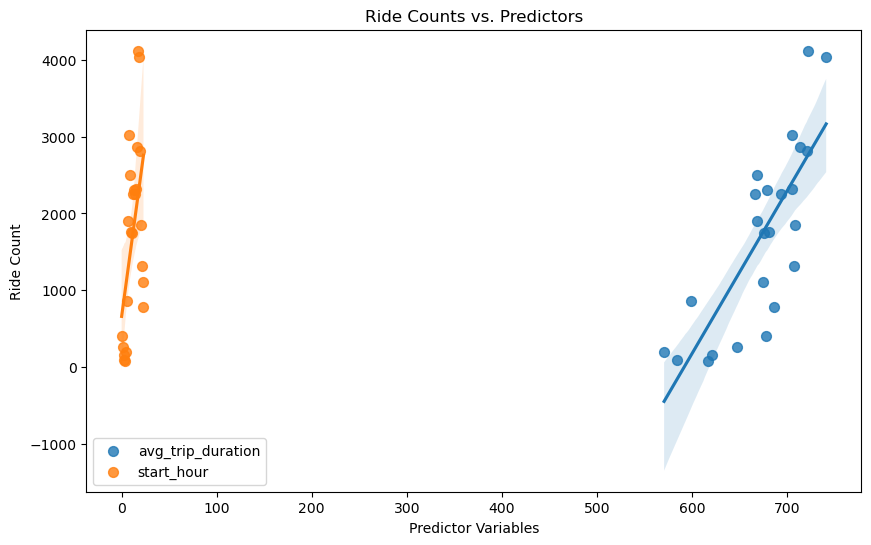

In [150]:
plt.figure(figsize=(10, 6))
sns.regplot(x='avg_trip_duration', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='start_hour', y='ride_count', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('Ride Counts vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('Ride Count')
plt.legend()
plt.show()

In [151]:
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]
X = sm.add_constant(X)

In [152]:
y = hourly_aggregated_filtered['avg_trip_duration']

In [153]:
model = sm.OLS(y, X).fit()

In [154]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      avg_trip_duration   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     28.41
Date:                Wed, 23 Aug 2023   Prob (F-statistic):           1.06e-06
Time:                        08:26:48   Log-Likelihood:                -109.22
No. Observations:                  24   AIC:                             224.4
Df Residuals:                      21   BIC:                             228.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        606.9446     10.244     59.248      0.0

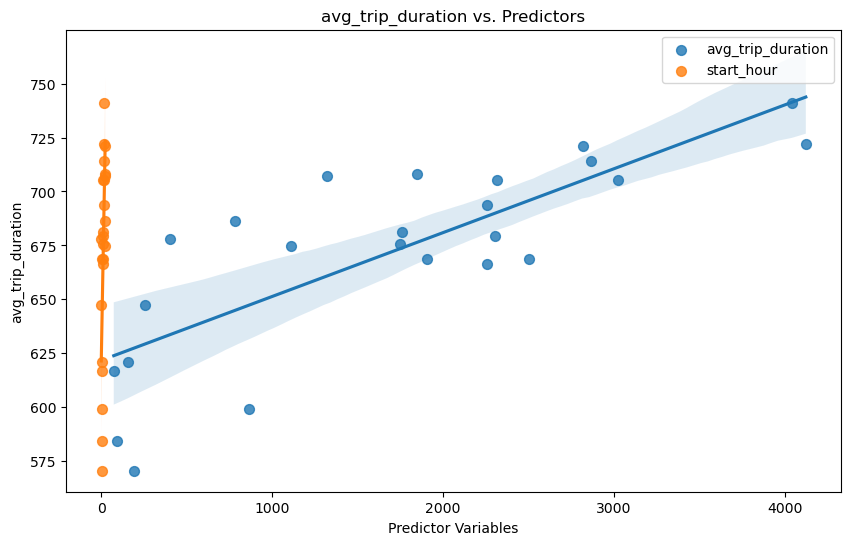

In [155]:
plt.figure(figsize=(10, 6))
sns.regplot(x='ride_count', y='avg_trip_duration', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x='start_hour', y='avg_trip_duration', data=hourly_aggregated_filtered, scatter_kws={'s': 50}, label='start_hour')
plt.title('avg_trip_duration vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('avg_trip_duration')
plt.legend()
plt.show()

In [157]:
X_avg_trip_duration = hourly_aggregated_filtered['ride_count'].values
y_avg_trip_duration = hourly_aggregated_filtered['avg_trip_duration'].values

X_start_hour = hourly_aggregated_filtered['start_hour'].values
y_avg_trip_duration = hourly_aggregated_filtered['avg_trip_duration'].values

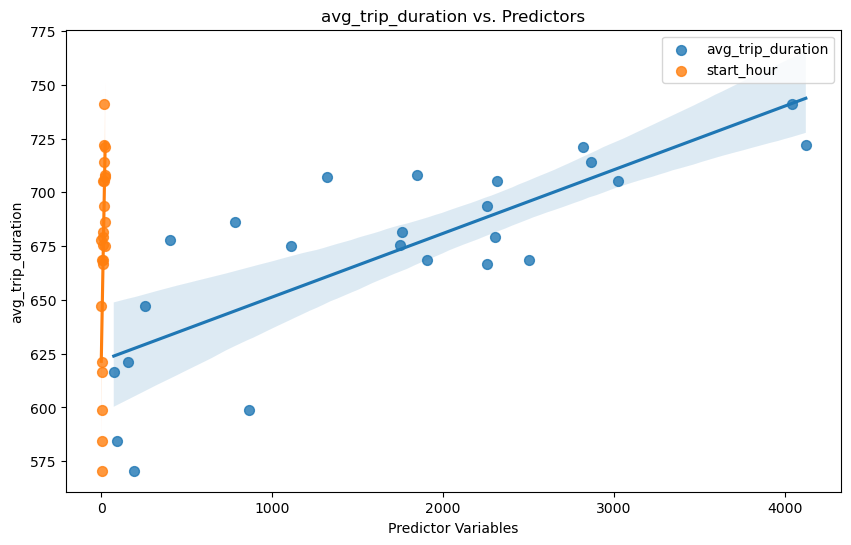

In [165]:
plt.figure(figsize=(10, 6))
sns.regplot(x=X_avg_trip_duration, y=y_avg_trip_duration, scatter_kws={'s': 50}, label='avg_trip_duration')
sns.regplot(x=X_start_hour, y=y_avg_trip_duration, scatter_kws={'s': 50}, label='start_hour')
plt.title('avg_trip_duration vs. Predictors')
plt.xlabel('Predictor Variables')
plt.ylabel('avg_trip_duration')
plt.legend()
plt.show()

In [182]:
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]  
y = hourly_aggregated_filtered['avg_trip_duration']  

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  

In [184]:
regression = LinearRegression() 

In [185]:
regression.fit(X_train, y_train)

LinearRegression()

In [186]:
y_predicted = regression.predict(X_test)

In [188]:
X = hourly_aggregated_filtered[['ride_count', 'start_hour']]  
y = hourly_aggregated_filtered['avg_trip_duration']  
assert len(X) == len(y), "X and y must have the same number of data points"

In [190]:
y_predicted = fitted_model.predict(X_test)

NameError: name 'fitted_model' is not defined

In [176]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (24, 2)
Shape of y: (24,)


In [177]:
y

0     677.868486
1     647.210117
2     620.936709
3     584.422222
4     616.589041
5     570.586387
6     598.979143
7     668.484277
8     705.284155
9     668.774760
10    681.419557
11    675.744133
12    666.543401
13    679.187771
14    693.548915
15    705.407599
16    713.957083
17    722.178554
18    741.052215
19    720.935037
20    708.226190
21    707.300986
22    674.930568
23    686.223077
Name: avg_trip_duration, dtype: float64

In [178]:
X

,ride_count,start_hour
0,403,0
1,257,1
2,158,2
3,90,3
4,73,4
5,191,5
6,863,6
7,1908,7
8,3023,8
9,2504,9


In [203]:
citi_1.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,0,0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,...,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,2023-08-23 18:18:55
1,1,1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,...,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,2023-08-23 18:38:53
2,2,2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,...,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,2023-08-23 19:44:04
3,3,3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,...,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,2023-08-23 11:54:37
4,4,4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,...,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,2023-08-23 22:01:01


In [204]:
citi_1_clean=citi_1[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'ride_start', 'ride_end',
       'Trip category', 'ride_start_date', 'ride_start_time']]

In [205]:
citi_1_clean

,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,2023-08-23 18:18:55
1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,2023-08-23 18:38:53
2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,2023-08-23 19:44:04
3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,2023-08-23 11:54:37
4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,2023-08-23 22:01:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42988,Sat,15,435,W 21 St & 6 Ave,40.741740,-73.994156,448,W 37 St & 10 Ave,40.756604,-73.997901,975,Subscriber,1973.0,1,2013-09-28 15:30:14,2013-09-28 15:46:29,10-20 minutes,2013-09-28,2023-08-23 15:30:14
42989,Sun,16,224,Spruce St & Nassau St,40.711464,-74.005524,301,E 2 St & Avenue B,40.722174,-73.983688,1541,Subscriber,1975.0,1,2013-09-01 16:27:11,2013-09-01 16:52:52,over 20 minutes,2013-09-01,2023-08-23 16:27:11
42990,Sat,17,261,Johnson St & Gold St,40.694749,-73.983625,151,Cleveland Pl & Spring St,40.721816,-73.997203,1191,Subscriber,1970.0,2,2013-09-14 17:32:26,2013-09-14 17:52:17,10-20 minutes,2013-09-14,2023-08-23 17:32:26
42991,Sat,18,402,Broadway & E 22 St,40.740343,-73.989551,524,W 43 St & 6 Ave,40.755273,-73.983169,1050,Subscriber,1961.0,2,2013-09-07 18:08:21,2013-09-07 18:25:51,10-20 minutes,2013-09-07,2023-08-23 18:08:21


In [206]:
filtered_citi.head()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,day_of_week,start_hour,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,...,end_station_longitude,trip_duration,subscriber,birth_year,gender,ride_start,ride_end,Trip category,ride_start_date,ride_start_time
0,0,0,0,Mon,18,523,W 38 St & 8 Ave,40.754666,-73.991382,334,...,-73.997262,993,Subscriber,1968.0,2,2013-09-09 18:18:55,2013-09-09 18:35:28,10-20 minutes,2013-09-09,2023-08-23 18:18:55
1,1,1,1,Thu,18,257,Lispenard St & Broadway,40.719392,-74.002472,236,...,-73.987140,581,Subscriber,1983.0,1,2013-09-12 18:38:53,2013-09-12 18:48:34,under 10 minutes,2013-09-12,2023-08-23 18:38:53
2,2,2,2,Wed,19,479,9 Ave & W 45 St,40.760193,-73.991255,513,...,-73.988639,361,Subscriber,1989.0,1,2013-09-18 19:44:04,2013-09-18 19:50:05,under 10 minutes,2013-09-18,2023-08-23 19:44:04
3,3,3,3,Sat,11,527,E 33 St & 1 Ave,40.743156,-73.974347,441,...,-73.967416,561,Subscriber,1988.0,2,2013-09-28 11:54:37,2013-09-28 12:03:58,under 10 minutes,2013-09-28,2023-08-23 11:54:37
4,4,4,4,Fri,22,293,Lafayette St & E 8 St,40.730287,-73.990765,432,...,-73.983799,427,Subscriber,1986.0,2,2013-09-27 22:01:01,2013-09-27 22:08:08,under 10 minutes,2013-09-27,2023-08-23 22:01:01


In [207]:
citi_1_clean=filtered_citi[['day_of_week','start_hour',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'trip_duration',
       'subscriber', 'birth_year', 'gender', 'ride_start', 'ride_end',
       'Trip category', 'ride_start_date', 'ride_start_time']]